In [14]:
import pandas as pd
from scipy import sparse
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

In [15]:
folders = glob("../../bds/*")
folders.sort()
folders

['../../bds\\0_5000',
 '../../bds\\10000_15000',
 '../../bds\\15000_25000',
 '../../bds\\5000_10000']

In [16]:
df_list = []
for folder in folders:
    df = pd.read_parquet(
        f"{folder}/encoded_data.parquet",
        columns=[
            "id",
            "url",
            "title",
            "created_date",
            "updated_date",
            "content_text_raw",
            "content_text",
        ],
    )
    df_list.append(df)
df = pd.concat(df_list, ignore_index=True)

In [17]:
df["created_date"] = pd.to_datetime(df["created_date"], format="%d/%m/%Y")
print("This dataset is a collection of legal documents about Real Estate")
print(
    f"Dataset contains {df.shape[0]} legal documents created from {df['created_date'].dt.date.min()} to {df['created_date'].dt.date.max()}."
)
print(f'Those documents are chunked into {df["content_text"].apply(len).sum()} chunks.')

This dataset is a collection of legal documents about Real Estate
Dataset contains 21019 legal documents created from 1945-11-30 to 2024-08-09.
Those documents are chunked into 218858 chunks.


In [18]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,url,title,created_date,updated_date,content_text_raw,content_text
0,0,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Quyết định 28/2024/QĐ-UBND hướng dẫn và biện p...,2024-08-09,10/08/2024,\n\n\n\n\n\n\n\n\n UỶ BAN NHÂN DÂN\n ...,[Chunk header:\nDocument title: Quyết định 28/...
1,1,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,"Quyết định 817/QĐ-TTg phê duyệt Đề án ""Kiểm kê...",2024-08-09,12/08/2024,\n\n\n\n\n\n\n\n\n THỦ\r\n TƯỚNG CHÍNH...,[Chunk header:\nDocument title: Quyết định 817...
2,2,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,"Chỉ thị 07/CT-UBND về tăng cường quản lý, sử d...",2024-08-08,14/08/2024,\n\n\n\n\n\n\n\n\n\n ỦY BAN NHÂN DÂN\n...,[Chunk header:\nDocument title: Chỉ thị 07/CT-...
3,3,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,"Quyết định 49/2024/QĐ-UBND quy định chức năng,...",2024-08-03,13/08/2024,\n\n\n\n\n\n\n\n\n\n ỦY BAN NHÂN DÂN\n...,[Chunk header:\nDocument title: Quyết định 49/...
4,4,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Quyết định 17/2024/QĐ-UBND quy định giấy tờ kh...,2024-08-02,09/08/2024,\n\n\n\n\n\n\n\n\n\n ỦY BAN NHÂN DÂN\n...,[Chunk header:\nDocument title: Quyết định 17/...


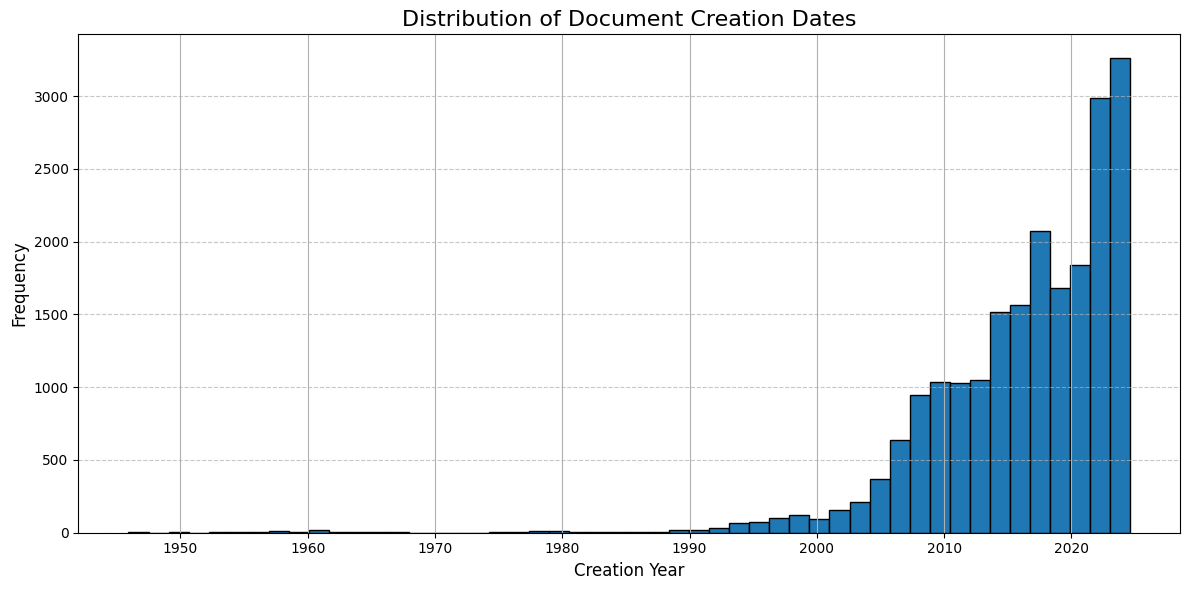

In [19]:
plt.figure(figsize=(12, 6))
df["created_date"].hist(bins=50, edgecolor="black")

# Customize the plot
plt.title("Distribution of Document Creation Dates", fontsize=16)
plt.xlabel("Creation Year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
def make_boxplot(series, ax, title, ylabel):
    data = series.values
    ax.boxplot(data)

    # Calculate statistics
    q1 = series.quantile(0.25)
    median = series.median()
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    mean = series.mean()

    # Calculate whisker ends
    lower_whisker = series[series >= q1 - 1.5 * iqr].min()
    upper_whisker = series[series <= q3 + 1.5 * iqr].max()

    # Customize the plot
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_yscale("log")  # Use log scale for y-axis due to large range

    # Remove x-axis labels as they're not meaningful in this context
    ax.set_xticks([])
    ax.grid(False)

    # Add horizontal lines for Q1, median, and Q3
    ax.axhline(q1, color="green", linestyle="--", alpha=0.8)
    ax.axhline(q3, color="green", linestyle="--", alpha=0.8)
    ax.axhline(median, color="blue", linestyle="--", alpha=0.8)
    ax.axhline(mean, color="red", linestyle="--", alpha=0.8)
    ax.axhline(lower_whisker, color="grey", linestyle="--", alpha=0.8)
    ax.axhline(upper_whisker, color="grey", linestyle="--", alpha=0.8)

    # Add text annotations for Q1, median, and Q3
    ax.text(0.51, q1 * 1.1, f"Q1: {q1:.0f}", color="green")
    ax.text(0.51, q3 * 1.1, f"Q3: {q3:.0f}", color="green")
    ax.text(0.51, median * 1.1, f"Median: {median:.0f}", color="blue")
    ax.text(0.51, mean * 0.82, f"Mean: {mean:.0f}", color="red")
    ax.text(0.51, lower_whisker * 1.1, f"{lower_whisker:.0f}", color="grey")
    ax.text(0.51, upper_whisker * 1.1, f"{upper_whisker:.0f}", color="grey")

In [21]:
length_of_document_words = df["content_text_raw"].apply(lambda x: len(x.split()))
length_of_document_chars = df["content_text_raw"].apply(len)
chunks_per_document = df["content_text"].apply(len)

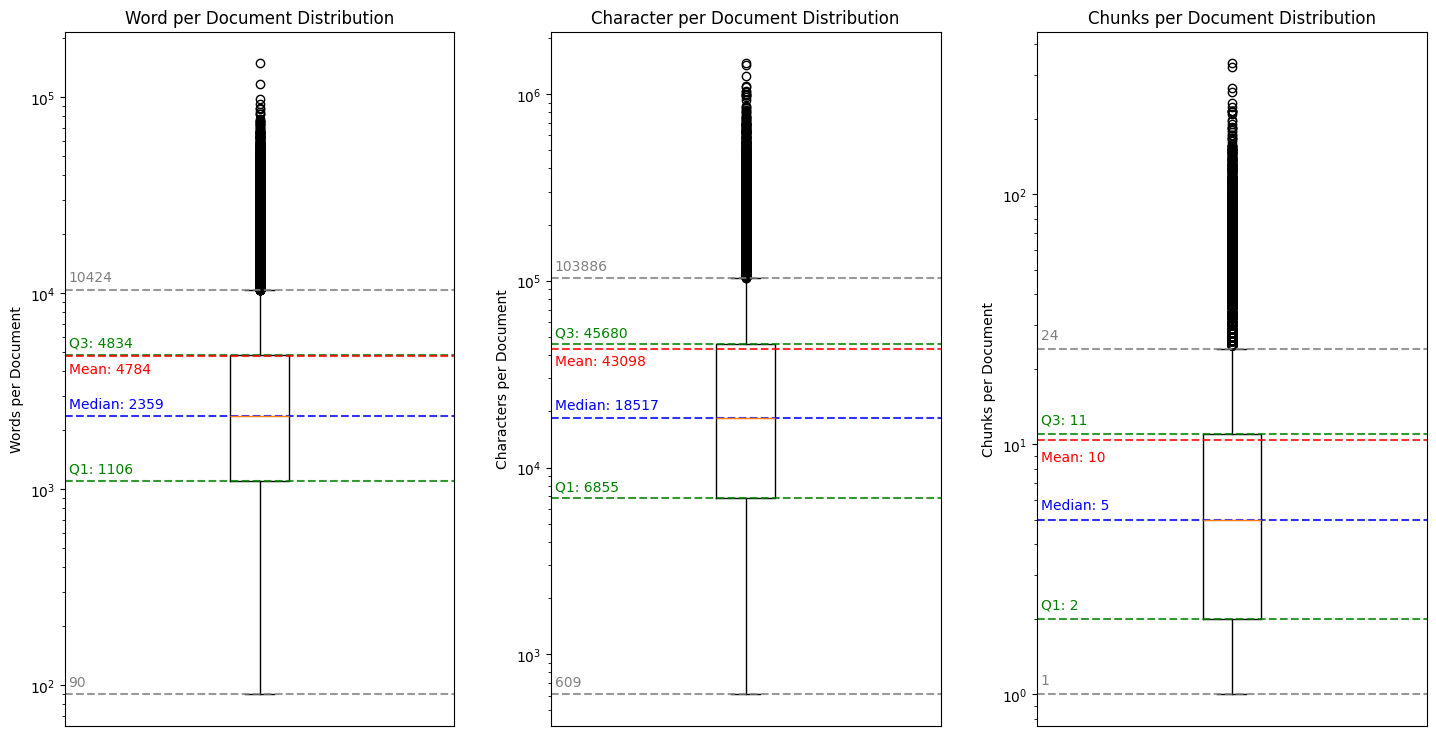

In [22]:
# Create the box plot
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(15, 8),
)
make_boxplot(
    length_of_document_words,
    ax1,
    title="Word per Document Distribution",
    ylabel="Words per Document",
)
make_boxplot(
    length_of_document_chars,
    ax2,
    title="Character per Document Distribution",
    ylabel="Characters per Document",
)
make_boxplot(
    chunks_per_document,
    ax3,
    title="Chunks per Document Distribution",
    ylabel="Chunks per Document",
)

# Show the plot
plt.tight_layout(pad=3.0)
plt.show()

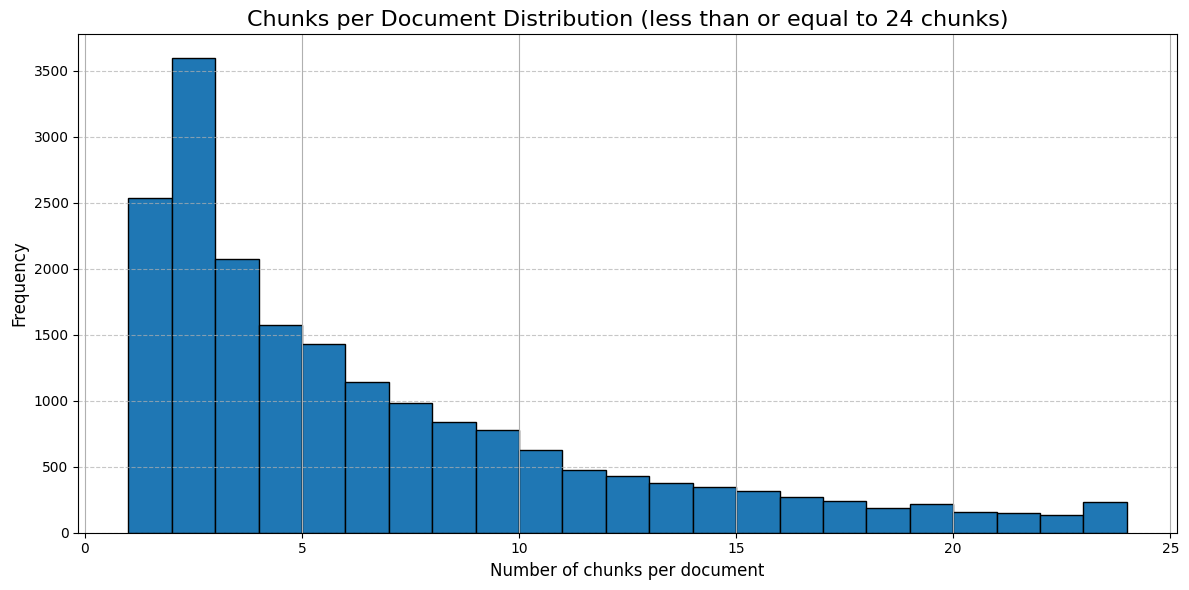

In [43]:
plt.figure(figsize=(12, 6))
chunks_per_document_less_than_24 = chunks_per_document[chunks_per_document <= 24]
chunks_per_document_less_than_24.hist(bins=range(25)[1:], edgecolor="black")

# Customize the plot
plt.title(
    "Chunks per Document Distribution (less than or equal to 24 chunks)", fontsize=16
)
plt.xlabel("Number of chunks per document", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Improve layout
plt.tight_layout()
plt.show()

,Number of chunks
count,1890.000000
mean,53.027513
std,33.741635
min,25.000000
25%,30.000000
50%,41.000000
75%,64.000000
max,335.000000


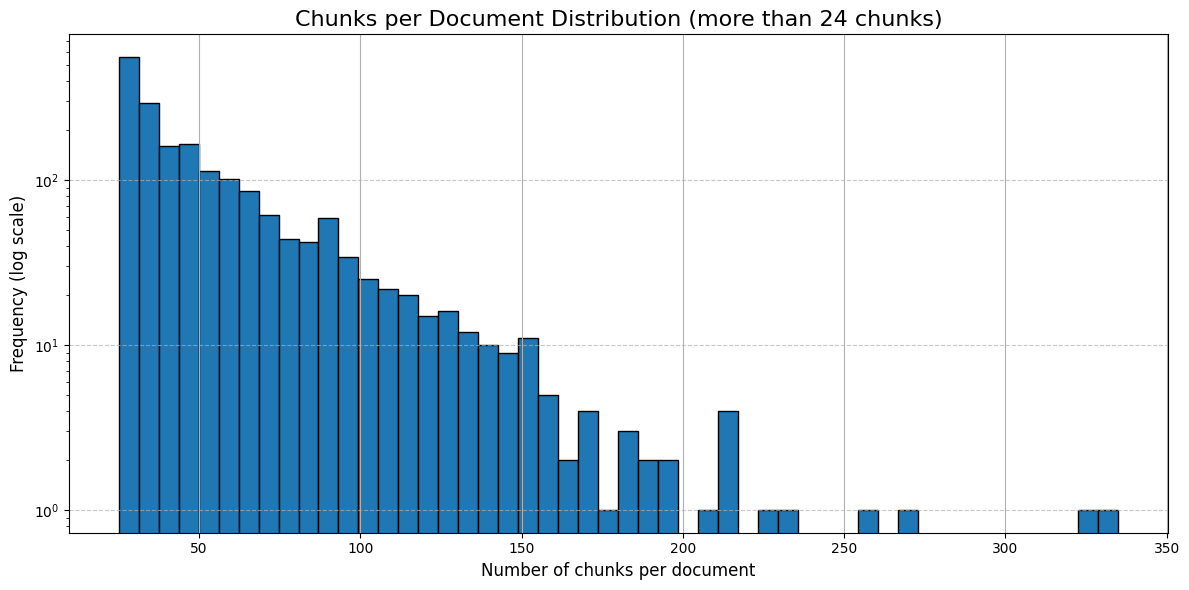

In [24]:
plt.figure(figsize=(12, 6))
chunks_per_document_more_than_24 = chunks_per_document[chunks_per_document > 24]
chunks_per_document_more_than_24.hist(bins=50, edgecolor="black")

# Customize the plot
plt.title("Chunks per Document Distribution (more than 24 chunks)", fontsize=16)
plt.xlabel("Number of chunks per document", fontsize=12)
plt.ylabel("Frequency (log scale)", fontsize=12)
plt.yscale("log")


# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Improve layout
plt.tight_layout()

display(
    chunks_per_document_more_than_24.rename("Number of chunks").describe().to_frame()
)
# Show the plot
plt.show()

In [25]:
chunks_series = df["content_text"].explode().rename("chunk")
print("Total number of chunks:", len(chunks_series))

Total number of chunks: 218858


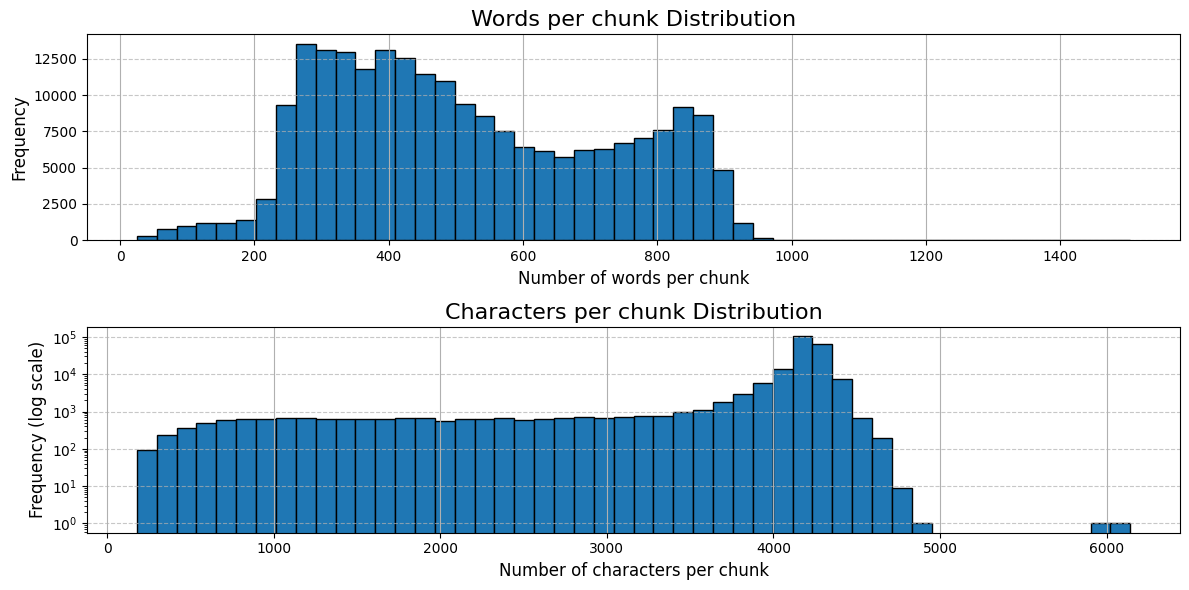

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Chunks per Document Distribution (words)
chunks_series.apply(lambda x: len(x.split())).hist(bins=50, edgecolor="black", ax=ax1)

# Customize the plot
ax1.set_title("Words per chunk Distribution", fontsize=16)
ax1.set_xlabel("Number of words per chunk", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)

# Add grid for better readability
ax1.grid(axis="y", linestyle="--", alpha=0.7)

chunks_series.apply(len).hist(bins=50, edgecolor="black", ax=ax2)


# Chunks per Document Distribution (characters)
# Customize the plot
ax2.set_title("Characters per chunk Distribution", fontsize=16)
ax2.set_xlabel("Number of characters per chunk", fontsize=12)
ax2.set_ylabel("Frequency (log scale)", fontsize=12)
ax2.set_yscale("log")

# Add grid for better readability
ax2.grid(axis="y", linestyle="--", alpha=0.7)


# Improve layout
plt.tight_layout()

# Show the plot
plt.show()